# MVAR Simulation for Microbiota and Metabolites

### MVAR Process

The MVAR model extends the traditional VAR model used to fit abundances over time, by incorporating metabolites. The model can be expressed as follows:

$$ X_t = A \cdot X_{t-1} + \epsilon_{X,t} $$
$$ S_t = B \cdot X_{t-1} + \epsilon_{S,t} $$

where:
- $X_t$ is the vector of microbiota abundances at time $t$,
- $S_t$ is the vector of metabolite abundances at time $t$,
- $A$ and $B$ are matrices representing the interactions within microbiota and between microbiota and metabolites, respectively,
- $\epsilon_{X,t}$ and $\epsilon_{S,t}$ are vectors of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

### Objective

The objective of this notebook is to simulate the dynamics between microbiota and metabolites using the MVAR model. Through simulation, we aim to demonstrate how specific interactions can be identified and quantified, providing insights into the causal relationships within these systems.

### Simulation with `VARsim.py` for sVAR Models

The `VARsim.py` script has been adapted to support MVAR simulation, allowing us to specify metabolite interaction matrices and simulate the dynamics of microbiota and metabolites over time. This section demonstrates how to use the script for simulating and visualizing the interactions captured by our MVAR model.


### Example Usage of `VARsim.py` for MVAR Simulation

The implementation of the VAR model in `VARsim.py` allows for detailed simulation of the dynamic interactions between microbiota and their produced metabolites. The script is designed to facilitate straightforward simulation of these complex biological systems. The following code examples provide a guide on how to leverage the `VARsim.py` script to simulate these interactions effectively:


In [1]:
# Importing the libraries
from mimic.model_simulate.sim_VAR import *

First, let's first generate synthetic data for microbiota using the sim_VAR class. We will then simulate the sparse interaction with a given matrix

In [2]:
# Simulate a VAR model

simulator = sim_VAR()

simulator.print_parameters()

Model parameters:
Model: VAR
n_obs: None
coefficients: None
initial_values: None
noise_stddev: None
output: None


We can now use the following parameters to generate the metabolic data:

```json
{
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}

In [3]:
simulator.read_parameters(r'parametersS.json')
simulator.print_parameters()

Model parameters:
Model: VAR
n_obs: 97
coefficients: [[ 0.8 -0.2  0.3]
 [ 0.3  0.5 -1. ]
 [ 0.2 -0.1  0.4]]
initial_values: [[1]
 [2]
 [0]]
noise_stddev: 1.2
output: show
coefficientsM: [[ 0.  -0.5  0. ]
 [ 0.1  0.1 -0.1]
 [-0.2  0.1  0.3]]
initial_valuesM: [[2]
 [0]
 [0]]


Using the following parameters for sVAR simulation: {'n_obs': 97, 'coefficients': array([[ 0.8, -0.2,  0.3],
       [ 0.3,  0.5, -1. ],
       [ 0.2, -0.1,  0.4]]), 'initial_values': array([[1],
       [2],
       [0]]), 'noise_stddev': 1.2, 'output': 'show', 'coefficientsM': array([[ 0. , -0.5,  0. ],
       [ 0.1,  0.1, -0.1],
       [-0.2,  0.1,  0.3]]), 'initial_valuesM': array([[2],
       [0],
       [0]])}


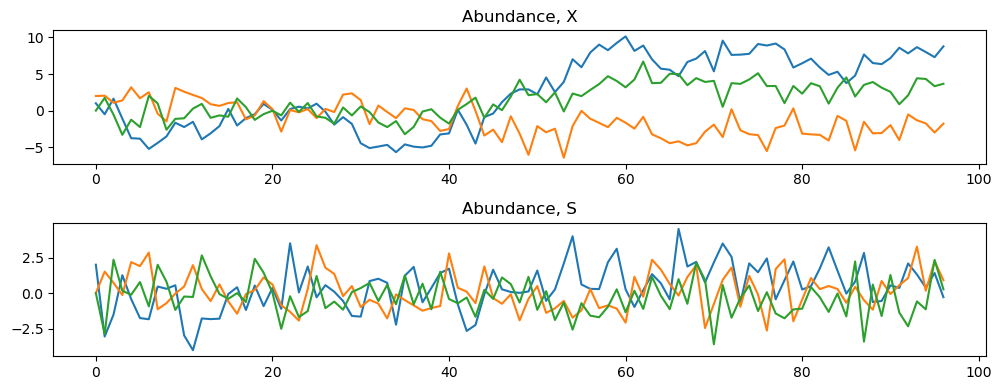

In [4]:
simulator.simulate('MVARsim')

### Visualization

To better understand the interactions and dynamics modeled by the MVAR process, we utilize specialized plotting functions within the `VARsim.py` script. These functions allow us to visualize the simulated abundance and metabolite time series data through heatmaps.

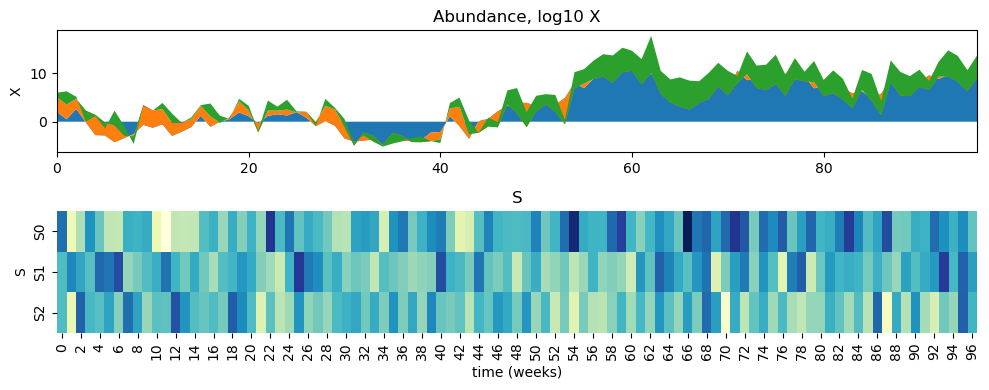

In [5]:
# Call the make_plot_stacked() method
simulator.make_plot_stacked(simulator.data, simulator.dataM)

In [8]:
data = simulator.data
# print(data)
data.shape

(97, 3)